In [1]:
# First, implement a version of the naive exact matching algorithm that is 
# strand-aware. That is, instead of looking only for occurrences of P in T, 
# additionally look for occurrences of thereverse complement of P in T. 
# If P is ACT, your function should find occurrences of both ACTand its 
# reverse complement AGT in T.

# If P and its reverse complement are identical (e.g. AACGTT), then a 
# given match offset should be reported only once. So if your new function is 
# called naive_with_rc, then the old naivefunction and your new naive_with_rc 
# function should return the same results when P equals its reverse complement.

In [99]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences


In [3]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t


In [4]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [5]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities


In [113]:
def naive_wit_rc_function(t,p):
    occurs = [];
    oc_fr = 0;
    rc = reverseComplement(t)
    seqs = [t, rc];
    if t == rc:
        seqs = [t];
    for c in range(len(seqs)):
        suboccurs = [];
        sub_oc_l = 0;
        for i in range(len(seqs[c])-len(p)+1):
            match = True
            for j in range(len(p)):
                if seqs[c][i+j] != p[j]:
                    match = False
                    break
            if match:
                suboccurs.append(i) # return the index of match
        sub_oc_l = len(suboccurs)
        occurs.append(suboccurs) # learned how to use append a bit
        oc_fr = oc_fr+sub_oc_l
    return occurs, oc_fr
                    
    

In [114]:
naive_wit_rc_function('AAACGACGT', 'AC')


([[2, 5], [0]], 3)

In [104]:
lvirus_genome = readGenome('/Users/eleana/Documents/GitHub/ads1-notebooks/lambda_virus.fa')

In [125]:
naive_wit_rc_function(lvirus_genome, 'AATT')

([[35,
   357,
   561,
   818,
   1458,
   1813,
   3773,
   3960,
   4036,
   4298,
   5005,
   6180,
   6262,
   6348,
   6806,
   7869,
   9673,
   9997,
   12231,
   12610,
   12729,
   13051,
   14697,
   15032,
   16206,
   18101,
   19577,
   20453,
   20663,
   21107,
   21184,
   21226,
   21438,
   22010,
   22039,
   22257,
   22433,
   22687,
   22715,
   22856,
   22862,
   22886,
   23054,
   23064,
   23081,
   23219,
   23256,
   23280,
   23433,
   23511,
   23674,
   23808,
   23818,
   23832,
   23976,
   24051,
   24067,
   24105,
   24274,
   24401,
   24485,
   24570,
   24620,
   24852,
   24984,
   25004,
   25166,
   25308,
   25475,
   25544,
   25707,
   25863,
   25918,
   25927,
   26104,
   26361,
   26423,
   26506,
   26547,
   26680,
   26749,
   26805,
   26985,
   27005,
   27074,
   27541,
   27679,
   27767,
   27823,
   28066,
   28162,
   28318,
   28510,
   28570,
   28584,
   28665,
   29092,
   29147,
   29435,
   29804,
   30303,
   30383,
   

In [110]:
len([[2, 5], [0]])

2

In [134]:
def naive_wit_rc_rev(p,t):
    occurs = [];
    oc_fr = 0;
    rc = reverseComplement(p)
    seqs = [p, rc];
    if p == rc:
        seqs = [p];
    for c in range(len(seqs)):
        suboccurs = [];
        sub_oc_l = 0;
        for i in range(len(t)-len(seqs[c])+1):
            match = True
            for j in range(len(seqs[c])):
                if t[i+j] != seqs[c][j]:
                    match = False
                    break
            if match:
                suboccurs.append(i) # return the index of match
        sub_oc_l = len(suboccurs)
        occurs.append(suboccurs) # learned how to use append a bit
        oc_fr = oc_fr+sub_oc_l
    return occurs, oc_fr
                    

In [137]:
naive_wit_rc_rev('ACTAAGT', lvirus_genome) #26028

([[27733, 45382], [26028]], 3)

In [138]:
rc = reverseComplement('ACTAAGT')
rc

'ACTTAGT'

In [139]:
naive_wit_rc_rev('AGTCGA', lvirus_genome) #450

([[18005, 23320, 33657, 44806], [450, 1908, 2472, 41927, 45369]], 9)

In [179]:
def naive_2mm(p, t):
    occurs = []
    oc_fr = 0;
    for i in range(len(t) - len(p) + 1):
        mms = 0  # number of mismatches
        for j in range(len(p)):
            if t[i + j] != p[j]:
                mms += 1
                if mms > 2:
                    break  # more than 2 mismatches, stop checking this position
        if mms <= 2:
            occurs.append(i)
    oc_fr = len(occurs)
    return occurs, oc_fr     

In [180]:
naive_2mm('ACTTTA','ACTTACTTGATAAAGT')

([0, 4], 2)

In [181]:
naive_2mm('TTCAAGCC',lvirus_genome) #191

([45,
  418,
  656,
  776,
  975,
  1311,
  1346,
  3166,
  3265,
  3292,
  3544,
  4237,
  4378,
  4481,
  4518,
  5240,
  5369,
  5597,
  5773,
  5871,
  5971,
  6350,
  6365,
  6564,
  6572,
  6684,
  6731,
  6764,
  6765,
  6929,
  7026,
  7487,
  7783,
  7790,
  8222,
  8251,
  8284,
  8749,
  9078,
  9197,
  9506,
  9942,
  10734,
  10969,
  11211,
  11331,
  11453,
  11640,
  11973,
  12711,
  13670,
  13750,
  13884,
  14687,
  14884,
  15745,
  16293,
  16817,
  17107,
  17349,
  17541,
  17779,
  17838,
  18792,
  19067,
  19719,
  19779,
  21614,
  21854,
  22174,
  22462,
  22722,
  22956,
  23126,
  23522,
  23677,
  23683,
  23820,
  23885,
  24369,
  24584,
  24787,
  25116,
  25554,
  26046,
  26665,
  26887,
  27237,
  27258,
  28166,
  28276,
  28531,
  28639,
  28920,
  28963,
  29021,
  29144,
  29733,
  29921,
  30176,
  30278,
  30362,
  30395,
  30536,
  30721,
  30967,
  31049,
  31379,
  31449,
  31474,
  31482,
  31641,
  31732,
  31749,
  31829,
  31867,
  31

In [182]:
naive_2mm('AGGAGGTT',lvirus_genome) # 49

([49,
  282,
  299,
  302,
  380,
  1560,
  1650,
  2235,
  2277,
  2400,
  2562,
  2565,
  2729,
  2823,
  3160,
  3181,
  3946,
  4210,
  4294,
  4309,
  4405,
  4580,
  5069,
  5159,
  5189,
  5231,
  5331,
  5519,
  5737,
  5882,
  5993,
  5996,
  6011,
  6312,
  6522,
  6585,
  6606,
  7316,
  7394,
  7819,
  7904,
  7966,
  7998,
  8534,
  8648,
  8946,
  9339,
  9354,
  9530,
  9842,
  9966,
  10041,
  10250,
  10416,
  10445,
  10484,
  10527,
  10874,
  11193,
  11292,
  11505,
  11568,
  11655,
  11745,
  11838,
  12078,
  12180,
  12222,
  12697,
  12745,
  12819,
  12880,
  12935,
  13011,
  13087,
  13256,
  13415,
  13526,
  13813,
  14259,
  15385,
  15473,
  16192,
  17101,
  17437,
  17755,
  17936,
  17989,
  18016,
  18040,
  18727,
  18853,
  18911,
  19232,
  19263,
  19310,
  19833,
  19929,
  19932,
  19947,
  19980,
  20793,
  20802,
  21305,
  21528,
  21627,
  21684,
  22414,
  22660,
  22670,
  22787,
  23326,
  24063,
  24145,
  24409,
  24595,
  24681,
  25

In [183]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2025-07-10 17:19:40--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
3.162.130.70, 3.162.130.139, 3.162.130.229, ...a8wq0iu5.cloudfront.net)... 
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|3.162.130.70|:443... connected.
200 OKequest sent, awaiting response... 
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K  --.-KB/s    in 0.09s   

2025-07-10 17:19:40 (2.51 MB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]



In [196]:
[seqs, quals] = readFastq('/Users/eleana/Documents/GitHub/ads1-notebooks/ERR037900_1.first1000.fastq')
len(quals)

1000

In [193]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [194]:
def createHist(qualities):
    # Create a histogram of quality scores
    hist = [0]*50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 17723, 0, 2, 11, 11, 28, 23, 55, 100, 111, 86, 174, 185, 272, 317, 259, 390, 1523, 2782, 762, 286, 413, 403, 538, 351, 694, 971, 777, 1024, 1449, 1341, 1312, 1916, 2233, 3025, 4043, 6640, 45696, 2074, 0, 0, 0, 0, 0, 0, 0, 0, 0]


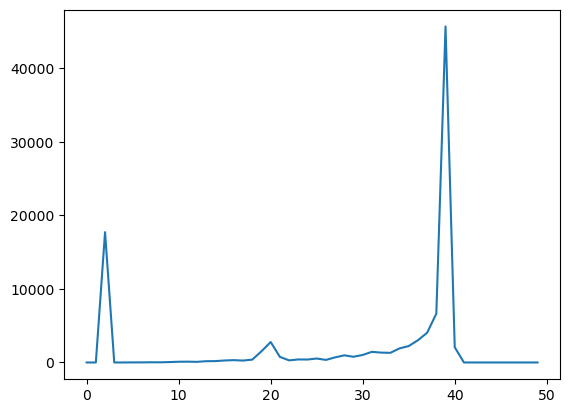

In [195]:
# Plot the histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(h)), h)
plt.show()

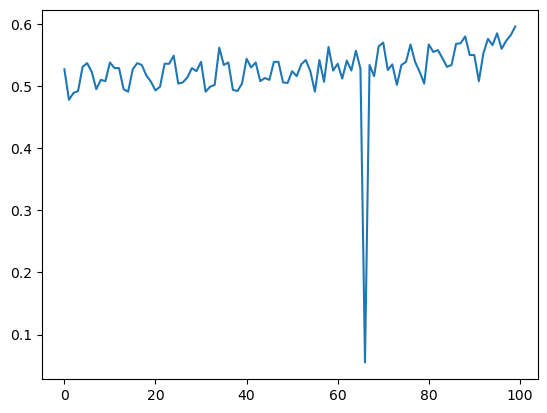

In [202]:
def findGCByPos(reads):
    ''' Find the GC ratio at each position in the read '''
    # Keep track of the number of G/C bases and the total number of bases at each position
    gc = [0] * 100
    totals = [0] * 100
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    # Divide G/C counts by total counts to get the average at each position
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    return gc

gc = findGCByPos(seqs)
plt.plot(range(len(gc)), gc)
plt.show()

In [198]:
import collections
count = collections.Counter()
for seq in seqs:
    count.update(seq)
count

Counter({'C': 29665, 'A': 24057, 'G': 22888, 'T': 22476, 'N': 914})